## Issue

Predicting the price of cars based on their characteristics.

********************* ********************* ********************* ********************* ********************* *****************

## Processus

![title](proc-dm.png)

********************* ********************* ********************* ********************* ********************* *****************

## Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
from sklearn.model_selection import train_test_split, learning_curve

import requests
from bs4 import BeautifulSoup
import os

import warnings
warnings.filterwarnings("ignore")

********************* ********************* ********************* ********************* ********************* *****************

## Construction of the dataset

In [ ]:
os.chdir('C:\\Users\hp\Documents\S3\DM\Projet')
print(os.getcwd())

In [ ]:
df=pd.DataFrame({})
for k in range(10000):
    print(k)
    url="https://www.avito.ma/fr/maroc/voitures-%C3%A0_vendre?o="+str(k+1)
    response=requests.get(url)
    soup=BeautifulSoup(response.text)
    li=soup.findAll("a",{"class":"li-card"})
    mo=soup.findAll("h2",{"class":"fs14 d-inline-block text-truncate"})
    lo=soup.findAll("div",{"class":"re-text"})
    
    for i in range(len(li)):
        response2=requests.get(li[i]['href'])
        soupi=BeautifulSoup(response2.text)
        pr2=soupi.find("p",{"class":"g6568y-0 GIWEw"})
        if pr2==None:
            pr=None
        else:
            pr=pr2.text.strip(' DH')
        
        n1=soupi.findAll("div",{"class":"sc-6p5md9-1 gPZzqa"})
        n2=soupi.findAll("span",{"class":"g6568y-0 jypWbQ"})
        Nbcols=[n1[f]['data-test'] for f in range(len(n1)) ]+[n2[f].text for f in range(len(n2)) ]
        
        r1=soupi.findAll("span",{"class":"g6568y-0 iKWYSN"})
        r2=soupi.findAll("span",{"class":"g6568y-0 dGDJdv"})
        r3=soupi.findAll("span",{"class":"g6568y-0 WhKdN"})
        brs=[r1[f].text for f in range(len(r1))]+[r2[f].text for f in range(len(r2))]
        
        dic2={}
        for j in range(len(Nbcols)):
            dic2[Nbcols[j]]=brs[j]
        dic2['équipements']=[r3[f].text for f in range(len(r3))]
        dic1={'Nom':[mo[i].find('a').text.replace('\n','')],'Location':lo[i].text.replace('\n',''),'Price':pr}
        dic1.update(dic2)
        df=df.append(dic1,ignore_index=True)

In [ ]:
df.to_csv (r'C:\Users\hp\Documents\S3\DM\Projet\voiture-big-dataset-score.csv', index = False, header=True)

********************* ********************* ********************* ********************* ********************* *****************

## Importing the Dataset

In [3]:
df=pd.read_csv('voiture-big-dataset-score.csv')

In [4]:
print(len(df))
df.head(3) #df.tail() #df.sample()

17430


,Type,Kilométrage,Année-Modèle,Marque,Modèle,Nombre de portes,Origine,Secteur,Première main,equipement,price,Type de carburant,Puissance fiscale,Boite à vitesse,score
0,"Voitures, Vente",60 000 - 64 999,2016,Ford,Fiesta,5.0,WW au Maroc,Hay Mohammadi,NaN,"['Airbags', 'Climatisation', 'Radar de recul',...","108,000 DH",Diesel,6 CV,Manuelle,15.0
1,"Voitures, Vente",0 - 4 999,2004,Citroen,Berlingo,5.0,WW au Maroc,Sidi Othmane,Non,"['Airbags', 'Vitres électriques', 'CD/MP3/Blue...","45,000 DH",Diesel,7 CV,Manuelle,5.0
2,"Voitures, Vente",250 000 - 299 999,2009,Autres,Autres,5.0,NaN,NaN,Oui,NaN,"100,000 DH",Diesel,10 CV,Manuelle,NaN


In [5]:
df.columns

Index(['Type', 'Kilométrage', 'Année-Modèle', 'Marque', 'Modèle',
       'Nombre de portes', 'Origine', 'Secteur', 'Première main', 'equipement',
       'price', 'Type de carburant', 'Puissance fiscale', 'Boite à vitesse',
       'score'],
      dtype='object')

In [6]:
df.info() #df.describe() #print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17430 entries, 0 to 17429
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Type               17394 non-null  object 
 1   Kilométrage        17387 non-null  object 
 2   Année-Modèle       17388 non-null  object 
 3   Marque             17383 non-null  object 
 4   Modèle             17383 non-null  object 
 5   Nombre de portes   13551 non-null  float64
 6   Origine            13058 non-null  object 
 7   Secteur            7921 non-null   object 
 8   Première main      12769 non-null  object 
 9   equipement         10103 non-null  object 
 10  price              14384 non-null  object 
 11  Type de carburant  17394 non-null  object 
 12  Puissance fiscale  17394 non-null  object 
 13  Boite à vitesse    17394 non-null  object 
 14  score              10103 non-null  float64
dtypes: float64(2), object(13)
memory usage: 2.0+ MB


Different data units with missing data.

********************* ********************* ********************* ********************* ********************* *****************

## Exploratory data analysis

#### Number of cars according to the number of doors

Text(0.5, 0, 'Nombre de portes')

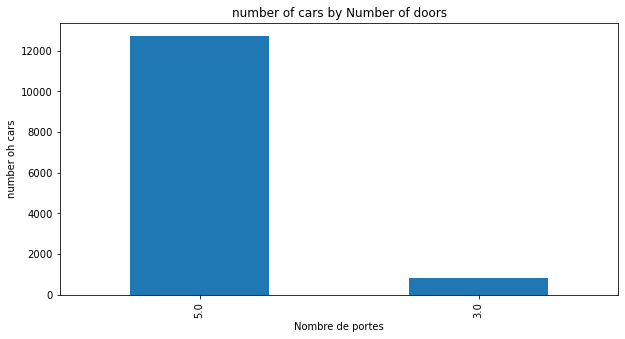

In [7]:
df['Nombre de portes'].value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title('number of cars by Number of doors')
plt.ylabel('number oh cars')
plt.xlabel('Nombre de portes')

More than 12000 cars have 5 doors, and almost 1000 cars have only 3 doors.

********************* ********************* ********************* ********************* ********************* *****************

#### Percentage of missing values by attribute

In [8]:
total = df.isnull().sum().sort_values(ascending=False)
percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Pourcentage'])
missing_data.head(30)

,Total,Pourcentage
Secteur,9509,54.555364
score,7327,42.036718
equipement,7327,42.036718
Première main,4661,26.741251
Origine,4372,25.083190
Nombre de portes,3879,22.254733
price,3046,17.475617
Modèle,47,0.269650
Marque,47,0.269650
Kilométrage,43,0.246701


Text(0.5, 1.0, 'Pourcentage des valeurs manquantes par attribut ')

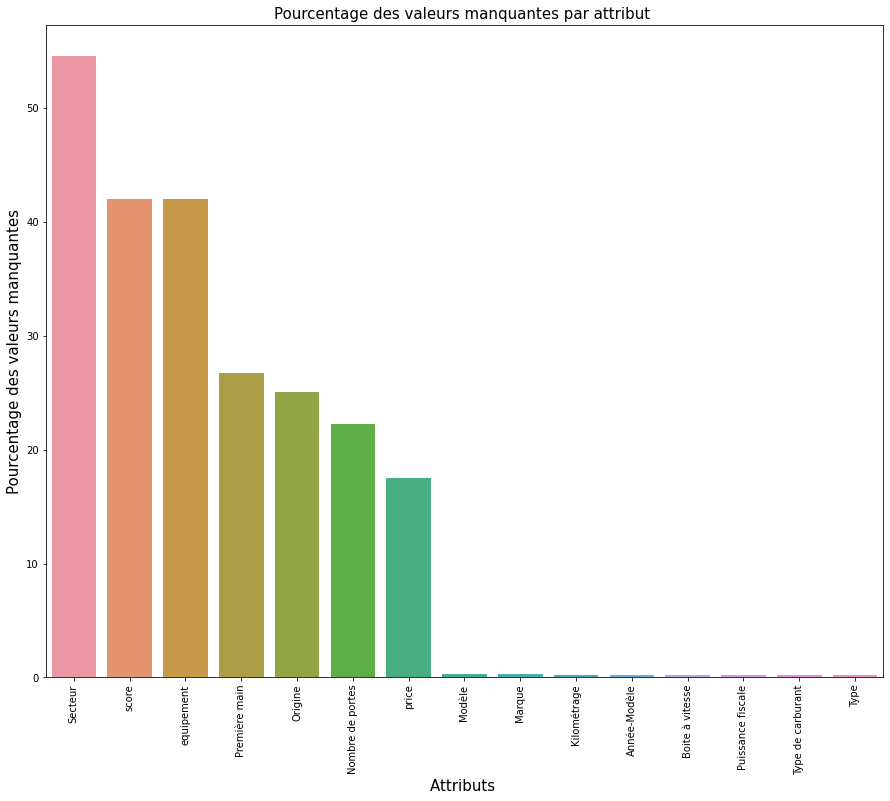

In [9]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=percent.index, y=percent)
plt.xlabel('Attributs ', fontsize=15)
plt.ylabel('Pourcentage des valeurs manquantes', fontsize=15)
plt.title('Pourcentage des valeurs manquantes par attribut ', fontsize=15)

The attributes Model, Brand..., Type have a low number of missing values, while we find high nbr in 
the sector has more than 50%, the score, first hand.

## Correction of data anomalies

#### price

In [10]:
df.price=df.price.str.replace(r"(,| DH)","")
p=[]
[p.append(float(i)) if i is not None else p.append(np.nan) for i in df['price']]
df.price=p

In [11]:
df.head(3)

,Type,Kilométrage,Année-Modèle,Marque,Modèle,Nombre de portes,Origine,Secteur,Première main,equipement,price,Type de carburant,Puissance fiscale,Boite à vitesse,score
0,"Voitures, Vente",60 000 - 64 999,2016,Ford,Fiesta,5.0,WW au Maroc,Hay Mohammadi,NaN,"['Airbags', 'Climatisation', 'Radar de recul',...",108000.0,Diesel,6 CV,Manuelle,15.0
1,"Voitures, Vente",0 - 4 999,2004,Citroen,Berlingo,5.0,WW au Maroc,Sidi Othmane,Non,"['Airbags', 'Vitres électriques', 'CD/MP3/Blue...",45000.0,Diesel,7 CV,Manuelle,5.0
2,"Voitures, Vente",250 000 - 299 999,2009,Autres,Autres,5.0,NaN,NaN,Oui,NaN,100000.0,Diesel,10 CV,Manuelle,NaN


********************* ********************* ********************* ********************* ********************* *****************

#### Gearbox

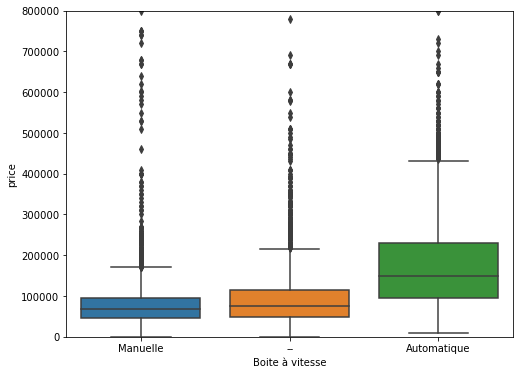

In [12]:
#box plot de Boite à vitesse et price
var = 'Boite à vitesse'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="price", data=data)
fig.axis(ymin=0, ymax=800000);

The prices of manual cars are between 200000DH and 800000DH, while automatic cars are between 450000DH and 800000

In [13]:
df['Boite à vitesse'].unique()

array(['Manuelle', '--', 'Automatique', nan], dtype=object)

In [14]:
df['Boite à vitesse']=df['Boite à vitesse'].replace('--',np.nan)

In [15]:
df['Boite à vitesse'].unique()

array(['Manuelle', nan, 'Automatique'], dtype=object)

********************* ********************* ********************* ********************* ********************* *****************

#### Année-Modèle

In [16]:
df['Année-Modèle'].unique()

array(['2016', '2004', '2009', '2010', '2011', '1987', '2015', '2017',
       '2003', '2005', '2002', '2018', '2008', '2020', '2012', '1994',
       '2014', '2001', '2013', '1991', '1996', '2007', '2006', '1999',
       '2019', '1985', '1992', '1986', '1995', '1988', '1989', '1998',
       '2000', '1980 ou plus ancien', '1990', '1997', '1984', nan, '1993',
       '1983', '1982', '1981'], dtype=object)

In [17]:
df['Année-Modèle']=df['Année-Modèle'].replace('1980 ou plus ancien','1980')
p=[]
[p.append(float(i)) if i is not None else p.append(np.nan) for i in df['Année-Modèle']]
df['Année-Modèle']=p

In [18]:
df['Année-Modèle'].unique()

array([2016., 2004., 2009., 2010., 2011., 1987., 2015., 2017., 2003.,
       2005., 2002., 2018., 2008., 2020., 2012., 1994., 2014., 2001.,
       2013., 1991., 1996., 2007., 2006., 1999., 2019., 1985., 1992.,
       1986., 1995., 1988., 1989., 1998., 2000., 1980., 1990., 1997.,
       1984.,   nan, 1993., 1983., 1982., 1981.])

********************* ********************* ********************* ********************* ********************* *****************

In [19]:
df.head(3)

,Type,Kilométrage,Année-Modèle,Marque,Modèle,Nombre de portes,Origine,Secteur,Première main,equipement,price,Type de carburant,Puissance fiscale,Boite à vitesse,score
0,"Voitures, Vente",60 000 - 64 999,2016.0,Ford,Fiesta,5.0,WW au Maroc,Hay Mohammadi,NaN,"['Airbags', 'Climatisation', 'Radar de recul',...",108000.0,Diesel,6 CV,Manuelle,15.0
1,"Voitures, Vente",0 - 4 999,2004.0,Citroen,Berlingo,5.0,WW au Maroc,Sidi Othmane,Non,"['Airbags', 'Vitres électriques', 'CD/MP3/Blue...",45000.0,Diesel,7 CV,Manuelle,5.0
2,"Voitures, Vente",250 000 - 299 999,2009.0,Autres,Autres,5.0,NaN,NaN,Oui,NaN,100000.0,Diesel,10 CV,Manuelle,NaN


********************* ********************* ********************* ********************* ********************* *****************

#### Puissance fiscale

In [20]:
df["Puissance fiscale"].unique()

array(['6 CV', '7 CV', '10 CV', '8 CV', '12 CV', '11 CV', '--', '9 CV',
       '5 CV', '17 CV', '13 CV', '14 CV', '15 CV', nan, '4 CV', '21 CV',
       '16 CV', '24 CV', '19 CV', '22 CV', '31 CV', '28 CV', '20 CV',
       '18 CV', '40 CV', '18', '23 CV', '41 CV', '26 CV', '33 CV',
       '25 CV', 'Plus de 41 CV', '39 CV', '34 CV', '36 CV', '30 CV'],
      dtype=object)

In [21]:
df['Puissance fiscale']=df['Puissance fiscale'].replace('Plus de 41 CV','41').replace('--',np.nan)
p=[]
[p.append(float(i.strip(' CV'))) if i is not np.nan else p.append(np.nan) for i in df['Puissance fiscale']]
df['Puissance fiscale']=p
df['Puissance fiscale'].unique()

array([ 6.,  7., 10.,  8., 12., 11., nan,  9.,  5., 17., 13., 14., 15.,
        4., 21., 16., 24., 19., 22., 31., 28., 20., 18., 40., 23., 41.,
       26., 33., 25., 39., 34., 36., 30.])

********************* ********************* ********************* ********************* ********************* *****************

In [22]:
df.head(3)

,Type,Kilométrage,Année-Modèle,Marque,Modèle,Nombre de portes,Origine,Secteur,Première main,equipement,price,Type de carburant,Puissance fiscale,Boite à vitesse,score
0,"Voitures, Vente",60 000 - 64 999,2016.0,Ford,Fiesta,5.0,WW au Maroc,Hay Mohammadi,NaN,"['Airbags', 'Climatisation', 'Radar de recul',...",108000.0,Diesel,6.0,Manuelle,15.0
1,"Voitures, Vente",0 - 4 999,2004.0,Citroen,Berlingo,5.0,WW au Maroc,Sidi Othmane,Non,"['Airbags', 'Vitres électriques', 'CD/MP3/Blue...",45000.0,Diesel,7.0,Manuelle,5.0
2,"Voitures, Vente",250 000 - 299 999,2009.0,Autres,Autres,5.0,NaN,NaN,Oui,NaN,100000.0,Diesel,10.0,Manuelle,NaN


********************* ********************* ********************* ********************* ********************* *****************

#### Type de carburant

In [23]:
df['Type de carburant'].unique()

array(['Diesel', 'Essence', 'Hybride', nan, 'Electrique', '--', 'LPG'],
      dtype=object)

In [24]:
df['Type de carburant']=df['Type de carburant'].replace('--',np.nan)

In [25]:
df['Type de carburant'].unique()

array(['Diesel', 'Essence', 'Hybride', nan, 'Electrique', 'LPG'],
      dtype=object)

********************* ********************* ********************* ********************* ********************* *****************

In [26]:
df.head(3)

,Type,Kilométrage,Année-Modèle,Marque,Modèle,Nombre de portes,Origine,Secteur,Première main,equipement,price,Type de carburant,Puissance fiscale,Boite à vitesse,score
0,"Voitures, Vente",60 000 - 64 999,2016.0,Ford,Fiesta,5.0,WW au Maroc,Hay Mohammadi,NaN,"['Airbags', 'Climatisation', 'Radar de recul',...",108000.0,Diesel,6.0,Manuelle,15.0
1,"Voitures, Vente",0 - 4 999,2004.0,Citroen,Berlingo,5.0,WW au Maroc,Sidi Othmane,Non,"['Airbags', 'Vitres électriques', 'CD/MP3/Blue...",45000.0,Diesel,7.0,Manuelle,5.0
2,"Voitures, Vente",250 000 - 299 999,2009.0,Autres,Autres,5.0,NaN,NaN,Oui,NaN,100000.0,Diesel,10.0,Manuelle,NaN


********************* ********************* ********************* ********************* ********************* *****************

#### Kilométrage

In [27]:
df['Kilométrage'].unique()

array(['60 000 - 64 999', '0 - 4 999', '250 000 - 299 999',
       '110 000 - 119 999', '85 000 - 89 999', '10 000 - 14 999',
       '150 000 - 159 999', '95 000 - 99 999', '120 000 - 129 999',
       '100 000 - 109 999', '160 000 - 169 999', '75 000 - 79 999',
       '30 000 - 34 999', '140 000 - 149 999', '5 000 - 9 999',
       '130 000 - 139 999', '35 000 - 39 999', '65 000 - 69 999',
       '200 000 - 249 999', '45 000 - 49 999', '55 000 - 59 999',
       '300 000 - 349 999', '90 000 - 94 999', '20 000 - 24 999',
       '80 000 - 84 999', '25 000 - 29 999', '190 000 - 199 999',
       '15 000 - 19 999', '400 000 - 449 999', '70 000 - 74 999',
       '40 000 - 44 999', '450 000 - 499 999', '50 000 - 54 999',
       '350 000 - 399 999', '170 000 - 179 999', '180 000 - 189 999',
       'Plus de 500 000', nan], dtype=object)

In [28]:
df['Kilométrage']=df['Kilométrage'].replace('Plus de 500 000','500000').replace(' ','')
print(df['Kilométrage'].isnull().sum())

43


In [29]:
df=df[df['Kilométrage'].notnull()]
a=[]
[a.append((float(i.replace(' ','').split('-')[0])+float(i.replace(' ','').split('-')[1]))//2) if '-' in i else a.append(float(i)) for i in df['Kilométrage']]
df['Kilométrage']=a
df['Kilométrage'].unique()

array([ 62499.,   2499., 274999., 114999.,  87499.,  12499., 154999.,
        97499., 124999., 104999., 164999.,  77499.,  32499., 144999.,
         7499., 134999.,  37499.,  67499., 224999.,  47499.,  57499.,
       324999.,  92499.,  22499.,  82499.,  27499., 194999.,  17499.,
       424999.,  72499.,  42499., 474999.,  52499., 374999., 174999.,
       184999., 500000.])

********************* ********************* ********************* ********************* ********************* *****************

In [30]:
df.head(3)

,Type,Kilométrage,Année-Modèle,Marque,Modèle,Nombre de portes,Origine,Secteur,Première main,equipement,price,Type de carburant,Puissance fiscale,Boite à vitesse,score
0,"Voitures, Vente",62499.0,2016.0,Ford,Fiesta,5.0,WW au Maroc,Hay Mohammadi,NaN,"['Airbags', 'Climatisation', 'Radar de recul',...",108000.0,Diesel,6.0,Manuelle,15.0
1,"Voitures, Vente",2499.0,2004.0,Citroen,Berlingo,5.0,WW au Maroc,Sidi Othmane,Non,"['Airbags', 'Vitres électriques', 'CD/MP3/Blue...",45000.0,Diesel,7.0,Manuelle,5.0
2,"Voitures, Vente",274999.0,2009.0,Autres,Autres,5.0,NaN,NaN,Oui,NaN,100000.0,Diesel,10.0,Manuelle,NaN


********************* ********************* ********************* ********************* ********************* *****************

#### Type

In [31]:
df.Type.unique()

array(['Voitures, Vente'], dtype=object)

In [32]:
del(df['Type'])

********************* ********************* ********************* ********************* ********************* *****************

## data cleansing

#### Type de carburant

In [33]:
df['Type de carburant'].isnull().sum()

4

In [34]:
df=df[df['Type de carburant'].notnull()]

********************* ********************* ********************* ********************* ********************* *****************

### Using KNN Imputer to replace missing values

#### Puissance fiscale

In [35]:
df['Puissance fiscale'].isnull().sum()

1412

In [36]:
#Imputation par les k plus proches voisins
from sklearn.impute import KNNImputer
df['Puissance fiscale'] = KNNImputer(n_neighbors=3).fit_transform(df['Puissance fiscale'].values.reshape(-1, 1))

In [37]:
df['Puissance fiscale'].isnull().sum()

0

********************* ********************* ********************* ********************* ********************* *****************

#### Replacing NaN by the most frequent Value (Categorical Features)

#### Boite à vitesse

In [38]:
df['Boite à vitesse'].isnull().sum()

2802

In [39]:
df["Boite à vitesse"] = df["Boite à vitesse"].map({'Automatique':1, 'Manuelle':0})

In [40]:
#df['price'].corr(df['Boite à vitesse'])

In [41]:
df["Boite à vitesse"].value_counts() 

0.0    11746
1.0     2835
Name: Boite à vitesse, dtype: int64

In [42]:
df['Boite à vitesse']=df['Boite à vitesse'].replace(np.nan,0)

In [43]:
df['Boite à vitesse'].isnull().sum()

0

********************* ********************* ********************* ********************* ********************* *****************

#### Origine

In [44]:
df['Origine'].isnull().sum()

4328

In [45]:
df['Origine'].value_counts()

WW au Maroc             9889
Dédouanée               2502
Importée neuve           582
Pas encore dédouanée      82
Name: Origine, dtype: int64

In [46]:
df['Origine']=df['Origine'].replace(np.nan,'WW au Maroc')

********************* ********************* ********************* ********************* ********************* *****************

In [47]:
df['Nombre de portes'].isnull().sum()

3832

In [48]:
df['Nombre de portes'].value_counts()

5.0    12729
3.0      822
Name: Nombre de portes, dtype: int64

In [49]:
df['Nombre de portes']=df['Nombre de portes'].fillna(5)

In [50]:
df['Nombre de portes'].value_counts()

5.0    16561
3.0      822
Name: Nombre de portes, dtype: int64

********************* ********************* ********************* ********************* ********************* *****************

In [51]:
df.head(3)

,Kilométrage,Année-Modèle,Marque,Modèle,Nombre de portes,Origine,Secteur,Première main,equipement,price,Type de carburant,Puissance fiscale,Boite à vitesse,score
0,62499.0,2016.0,Ford,Fiesta,5.0,WW au Maroc,Hay Mohammadi,NaN,"['Airbags', 'Climatisation', 'Radar de recul',...",108000.0,Diesel,6.0,0.0,15.0
1,2499.0,2004.0,Citroen,Berlingo,5.0,WW au Maroc,Sidi Othmane,Non,"['Airbags', 'Vitres électriques', 'CD/MP3/Blue...",45000.0,Diesel,7.0,0.0,5.0
2,274999.0,2009.0,Autres,Autres,5.0,WW au Maroc,NaN,Oui,NaN,100000.0,Diesel,10.0,0.0,NaN


In [52]:
df.describe()

,Kilométrage,Année-Modèle,Nombre de portes,price,Puissance fiscale,Boite à vitesse,score
count,17383.000000,17383.000000,17383.000000,1.437500e+04,17383.000000,17383.000000,10101.000000
mean,125757.941207,2007.845769,4.905425,1.468967e+05,7.405047,0.163090,12.469854
std,97843.987817,8.603781,0.424519,5.912260e+06,2.271964,0.369459,7.420603
min,2499.000000,1980.000000,3.000000,1.500000e+02,4.000000,0.000000,1.000000
25%,47499.000000,2004.000000,5.000000,4.800000e+04,6.000000,0.000000,6.000000
50%,114999.000000,2010.000000,5.000000,7.500000e+04,7.000000,0.000000,12.000000
75%,184999.000000,2015.000000,5.000000,1.150000e+05,8.000000,0.000000,19.000000
max,500000.000000,2020.000000,5.000000,7.086251e+08,41.000000,1.000000,25.000000


********************* ********************* ********************* ********************* ********************* *****************

### Removing Outliers / Exploring features correlation

<AxesSubplot:xlabel='score', ylabel='price'>

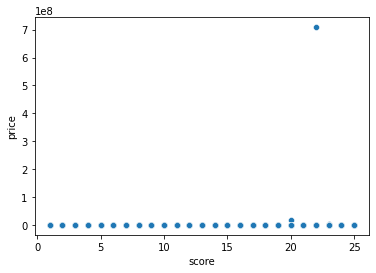

In [53]:
sns.scatterplot(x='score',y='price',data=df)

In [54]:
df['price'].corr(df['score'])

0.020392573221358495

In [55]:
max_tresh=df['price'].quantile(0.99)
max_tresh

460000.0

In [56]:
min_tresh=df['price'].quantile(0.01)
min_tresh

14870.000000000004

In [57]:
len(df)

17383

In [58]:
dft=df[(df.price < max_tresh)]

<AxesSubplot:xlabel='score', ylabel='price'>

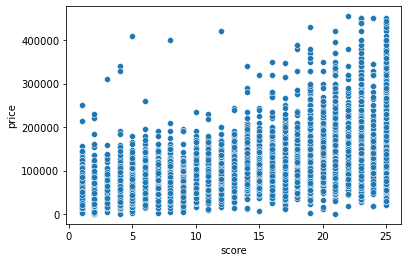

In [59]:
sns.scatterplot(x='score',y='price',data=dft)

In [60]:
dft['price'].corr(dft['score'])

0.6282729903141537

In [61]:
len(dft)

14227

<AxesSubplot:xlabel='price', ylabel='Density'>

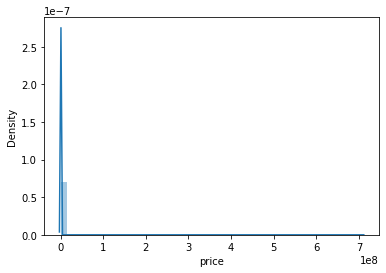

In [62]:
sns.distplot(df['price'])

<AxesSubplot:xlabel='price', ylabel='Density'>

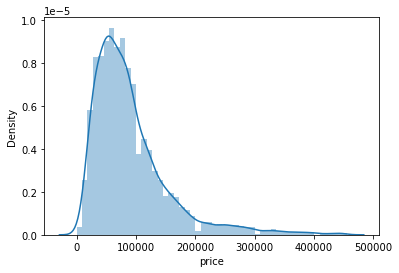

In [63]:
sns.distplot(dft['price'])

********************* ********************* ********************* ********************* ********************* *****************

<AxesSubplot:xlabel='Kilométrage', ylabel='price'>

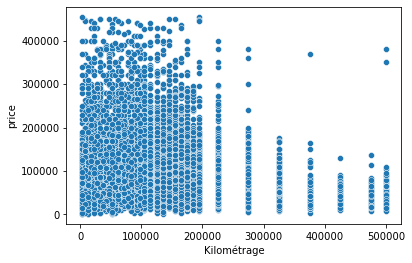

In [64]:
sns.scatterplot(x='Kilométrage',y='price',data=dft)

********************* ********************* ********************* ********************* ********************* *****************

<AxesSubplot:xlabel='Année-Modèle', ylabel='price'>

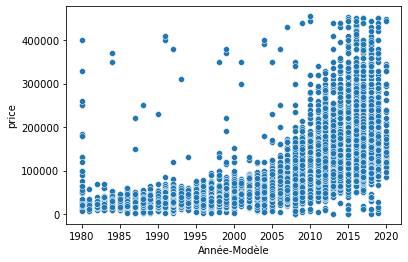

In [65]:
sns.scatterplot(x='Année-Modèle',y='price',data=dft)

********************* ********************* ********************* ********************* ********************* *****************

## One Hot encoding

#### Type de carburant

In [66]:
dft['Type de carburant'].unique()

array(['Diesel', 'Essence', 'Hybride', 'Electrique', 'LPG'], dtype=object)

In [67]:
df2 = pd.get_dummies(dft['Type de carburant'], prefix = 'carburant')
dft = pd.concat([dft,df2], axis=1)
dft.head(3)

,Kilométrage,Année-Modèle,Marque,Modèle,Nombre de portes,Origine,Secteur,Première main,equipement,price,Type de carburant,Puissance fiscale,Boite à vitesse,score,carburant_Diesel,carburant_Electrique,carburant_Essence,carburant_Hybride,carburant_LPG
0,62499.0,2016.0,Ford,Fiesta,5.0,WW au Maroc,Hay Mohammadi,NaN,"['Airbags', 'Climatisation', 'Radar de recul',...",108000.0,Diesel,6.0,0.0,15.0,1,0,0,0,0
1,2499.0,2004.0,Citroen,Berlingo,5.0,WW au Maroc,Sidi Othmane,Non,"['Airbags', 'Vitres électriques', 'CD/MP3/Blue...",45000.0,Diesel,7.0,0.0,5.0,1,0,0,0,0
2,274999.0,2009.0,Autres,Autres,5.0,WW au Maroc,NaN,Oui,NaN,100000.0,Diesel,10.0,0.0,NaN,1,0,0,0,0


In [68]:
dft['carburant_LPG'].value_counts()

0    14226
1        1
Name: carburant_LPG, dtype: int64

In [69]:
del(dft['carburant_LPG'])
del(dft['Type de carburant'])

********************* ********************* ********************* ********************* ********************* *****************

In [70]:
dft.head(3)

,Kilométrage,Année-Modèle,Marque,Modèle,Nombre de portes,Origine,Secteur,Première main,equipement,price,Puissance fiscale,Boite à vitesse,score,carburant_Diesel,carburant_Electrique,carburant_Essence,carburant_Hybride
0,62499.0,2016.0,Ford,Fiesta,5.0,WW au Maroc,Hay Mohammadi,NaN,"['Airbags', 'Climatisation', 'Radar de recul',...",108000.0,6.0,0.0,15.0,1,0,0,0
1,2499.0,2004.0,Citroen,Berlingo,5.0,WW au Maroc,Sidi Othmane,Non,"['Airbags', 'Vitres électriques', 'CD/MP3/Blue...",45000.0,7.0,0.0,5.0,1,0,0,0
2,274999.0,2009.0,Autres,Autres,5.0,WW au Maroc,NaN,Oui,NaN,100000.0,10.0,0.0,NaN,1,0,0,0


********************* ********************* ********************* ********************* ********************* *****************

#### Origine

In [71]:
dft['Origine'].unique()

array(['WW au Maroc', 'Dédouanée', 'Importée neuve',
       'Pas encore dédouanée'], dtype=object)

In [72]:
df2 = pd.get_dummies(dft['Origine'], prefix = 'Orig')
dft = pd.concat([dft,df2], axis=1)

In [73]:
del(dft['Origine'])
del(dft['Orig_Pas encore dédouanée'])

In [74]:
dft.head(3)

,Kilométrage,Année-Modèle,Marque,Modèle,Nombre de portes,Secteur,Première main,equipement,price,Puissance fiscale,Boite à vitesse,score,carburant_Diesel,carburant_Electrique,carburant_Essence,carburant_Hybride,Orig_Dédouanée,Orig_Importée neuve,Orig_WW au Maroc
0,62499.0,2016.0,Ford,Fiesta,5.0,Hay Mohammadi,NaN,"['Airbags', 'Climatisation', 'Radar de recul',...",108000.0,6.0,0.0,15.0,1,0,0,0,0,0,1
1,2499.0,2004.0,Citroen,Berlingo,5.0,Sidi Othmane,Non,"['Airbags', 'Vitres électriques', 'CD/MP3/Blue...",45000.0,7.0,0.0,5.0,1,0,0,0,0,0,1
2,274999.0,2009.0,Autres,Autres,5.0,NaN,Oui,NaN,100000.0,10.0,0.0,NaN,1,0,0,0,0,0,1


********************* ********************* ********************* ********************* ********************* *****************

In [75]:
dft['Première main'].loc[(dft['price'] >= 175000.0)].value_counts()

Oui    642
Non    289
Name: Première main, dtype: int64

In [76]:
dft.isnull().sum()

Kilométrage                0
Année-Modèle               0
Marque                     0
Modèle                     0
Nombre de portes           0
Secteur                 7474
Première main           3717
equipement              5858
price                      0
Puissance fiscale          0
Boite à vitesse            0
score                   5858
carburant_Diesel           0
carburant_Electrique       0
carburant_Essence          0
carburant_Hybride          0
Orig_Dédouanée             0
Orig_Importée neuve        0
Orig_WW au Maroc           0
dtype: int64

In [78]:
del(dft['equipement'])

In [81]:
del(dfp['Secteur'])

In [79]:
dfp=dft

In [83]:
dfp['Première main'].value_counts()

Non    6486
Oui    4024
Name: Première main, dtype: int64

In [88]:
dfp['Première main']=dfp['Première main'].replace("Non",0).replace("Oui",1).replace(np.nan,0)

In [89]:
dfp['Première main'].isnull().sum()

0

In [90]:
dfp['Première main'].value_counts()

0.0    10203
1.0     4024
Name: Première main, dtype: int64

In [85]:
dfp.corr()

,Kilométrage,Année-Modèle,Nombre de portes,Première main,price,Puissance fiscale,Boite à vitesse,score,carburant_Diesel,carburant_Electrique,carburant_Essence,carburant_Hybride,Orig_Dédouanée,Orig_Importée neuve,Orig_WW au Maroc
Kilométrage,1.000000,-0.179047,0.041761,-0.146388,-0.134186,0.100711,-0.015956,-0.056852,0.072155,-0.013571,-0.069469,-0.025138,0.077886,0.031467,-0.085640
Année-Modèle,-0.179047,1.000000,0.047343,0.300706,0.584844,-0.099646,0.204297,0.517102,0.183075,-0.002341,-0.185529,0.022301,-0.386220,-0.002023,0.362560
Nombre de portes,0.041761,0.047343,1.000000,-0.007830,0.021393,-0.034692,-0.024748,0.041567,0.099632,-0.036749,-0.098281,-0.001788,-0.065764,-0.008097,0.066106
Première main,-0.146388,0.300706,-0.007830,1.000000,0.262954,-0.028275,0.153941,0.250799,0.093755,-0.001223,-0.096125,0.025942,-0.054819,0.030617,0.034678
price,-0.134186,0.584844,0.021393,0.262954,1.000000,0.162226,0.482732,0.628273,0.281515,-0.013074,-0.285170,0.039743,-0.112535,0.072313,0.075864
Puissance fiscale,0.100711,-0.099646,-0.034692,-0.028275,0.162226,1.000000,0.329207,0.206634,-0.101768,0.001273,0.101953,0.000501,0.082909,0.081692,-0.121061
Boite à vitesse,-0.015956,0.204297,-0.024748,0.153941,0.482732,0.329207,1.000000,0.467321,0.050822,0.004481,-0.056452,0.056117,0.027062,0.091509,-0.066179
score,-0.056852,0.517102,0.041567,0.250799,0.628273,0.206634,0.467321,1.000000,0.199890,-0.019852,-0.201193,0.013514,-0.069321,0.089107,0.021191
carburant_Diesel,0.072155,0.183075,0.099632,0.093755,0.281515,-0.101768,0.050822,0.199890,1.000000,-0.032373,-0.995152,-0.068708,0.036767,0.001890,-0.033700
carburant_Electrique,-0.013571,-0.002341,-0.036749,-0.001223,-0.013074,0.001273,0.004481,-0.019852,-0.032373,1.000000,-0.008645,-0.000597,-0.006824,0.021844,-0.003280


# -----------------------------------

In [ ]:
mx=dfp['price'].max()
mn=dfp['price'].min()
save_list = open("voiture_models/maxprice.pickle","wb")
pickle.dump(mx, save_list)
save_list.close()

save_list = open("voiture_models/minprice.pickle","wb")
pickle.dump(mn, save_list)
save_list.close()

# -----------------------------------

In [92]:
dfr=dfp

In [93]:
dfr['score']=dfr['score'].fillna(dfr['score'].mean())

In [94]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14227 entries, 0 to 17429
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Kilométrage           14227 non-null  float64
 1   Année-Modèle          14227 non-null  float64
 2   Marque                14227 non-null  object 
 3   Modèle                14227 non-null  object 
 4   Nombre de portes      14227 non-null  float64
 5   Première main         14227 non-null  float64
 6   price                 14227 non-null  float64
 7   Puissance fiscale     14227 non-null  float64
 8   Boite à vitesse       14227 non-null  float64
 9   score                 14227 non-null  float64
 10  carburant_Diesel      14227 non-null  uint8  
 11  carburant_Electrique  14227 non-null  uint8  
 12  carburant_Essence     14227 non-null  uint8  
 13  carburant_Hybride     14227 non-null  uint8  
 14  Orig_Dédouanée        14227 non-null  uint8  
 15  Orig_Importée neuve

In [95]:
df2 = pd.get_dummies(dfr['Modèle'], prefix = 'mod')
dfr = pd.concat([dfr,df2], axis=1)
dfr.head()

,Kilométrage,Année-Modèle,Marque,Modèle,Nombre de portes,Première main,price,Puissance fiscale,Boite à vitesse,score,...,mod_i 40,mod_ix 35,mod_lancer,mod_nativa,mod_one,mod_outlander,mod_pajero,mod_pajero sport,mod_pick up,mod_primera
0,62499.0,2016.0,Ford,Fiesta,5.0,0.0,108000.0,6.0,0.0,15.000000,...,0,0,0,0,0,0,0,0,0,0
1,2499.0,2004.0,Citroen,Berlingo,5.0,0.0,45000.0,7.0,0.0,5.000000,...,0,0,0,0,0,0,0,0,0,0
2,274999.0,2009.0,Autres,Autres,5.0,1.0,100000.0,10.0,0.0,12.350938,...,0,0,0,0,0,0,0,0,0,0
3,114999.0,2010.0,Citroen,C4,5.0,0.0,85000.0,6.0,0.0,12.350938,...,0,0,0,0,0,0,0,0,0,0
4,87499.0,2011.0,Volkswagen,PASSAT CC,5.0,0.0,143000.0,8.0,0.0,22.000000,...,0,0,0,0,0,0,0,0,0,0


In [96]:
df2 = pd.get_dummies(dfr['Marque'], prefix = 'marq')
dfr = pd.concat([dfr,df2], axis=1)
dfr.head()

,Kilométrage,Année-Modèle,Marque,Modèle,Nombre de portes,Première main,price,Puissance fiscale,Boite à vitesse,score,...,marq_Ssangyong,marq_Subaru,marq_Suzuki,marq_Toyota,marq_UFO,marq_Volkswagen,marq_Volvo,marq_Zotye,marq_lancia,marq_mini
0,62499.0,2016.0,Ford,Fiesta,5.0,0.0,108000.0,6.0,0.0,15.000000,...,0,0,0,0,0,0,0,0,0,0
1,2499.0,2004.0,Citroen,Berlingo,5.0,0.0,45000.0,7.0,0.0,5.000000,...,0,0,0,0,0,0,0,0,0,0
2,274999.0,2009.0,Autres,Autres,5.0,1.0,100000.0,10.0,0.0,12.350938,...,0,0,0,0,0,0,0,0,0,0
3,114999.0,2010.0,Citroen,C4,5.0,0.0,85000.0,6.0,0.0,12.350938,...,0,0,0,0,0,0,0,0,0,0
4,87499.0,2011.0,Volkswagen,PASSAT CC,5.0,0.0,143000.0,8.0,0.0,22.000000,...,0,0,0,0,0,1,0,0,0,0


In [97]:
del(dfr['Modèle'])
del(dfr['Marque'])

In [98]:
for i in dfr.columns[:]:
    data = dfr[i].values.reshape(-1,1)
    dfr[i]=(dfr[i]-dfr[i].min())/(dfr[i].max()-dfr[i].min())
dfr.head(3)

,Kilométrage,Année-Modèle,Nombre de portes,Première main,price,Puissance fiscale,Boite à vitesse,score,carburant_Diesel,carburant_Electrique,...,marq_Ssangyong,marq_Subaru,marq_Suzuki,marq_Toyota,marq_UFO,marq_Volkswagen,marq_Volvo,marq_Zotye,marq_lancia,marq_mini
0,0.120603,0.900,1.0,0.0,0.237111,0.054054,0.0,0.583333,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.600,1.0,0.0,0.098604,0.081081,0.0,0.166667,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.547738,0.725,1.0,1.0,0.219523,0.162162,0.0,0.472956,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# ----------------------------------------

In [ ]:
maxscore=dfr['score'].max()
minscore=dfr['score'].min()

save_list = open("voiture_models/maxscore.pickle","wb")
pickle.dump(maxscore, save_list)
save_list.close()

save_list = open("voiture_models/minscore.pickle","wb")
pickle.dump(minscore, save_list)
save_list.close()

maxkilometrage=dfr['Kilométrage'].max()
minkilometrage=dfr['Kilométrage'].min()

save_list = open("voiture_models/maxkilometrage.pickle","wb")
pickle.dump(maxkilometrage, save_list)
save_list.close()

save_list = open("voiture_models/minkilometrage.pickle","wb")
pickle.dump(minkilometrage, save_list)
save_list.close()

maxpuissance=dfr['Puissance fiscale'].max()
minpuissance=dfr['Puissance fiscale'].min()

save_list = open("voiture_models/maxpuissance.pickle","wb")
pickle.dump(maxpuissance, save_list)
save_list.close()

save_list = open("voiture_models/minpuissance.pickle","wb")
pickle.dump(minpuissance, save_list)
save_list.close()

maxannee=dfr['Année-Modèle'].max()
minannee=dfr['Année-Modèle'].min()

save_list = open("voiture_models/maxannee.pickle","wb")
pickle.dump(maxannee, save_list)
save_list.close()

save_list = open("voiture_models/minannee.pickle","wb")
pickle.dump(minannee, save_list)
save_list.close()

# ----------------------------------------

In [ ]:
maxnbr=dfr['Nombre de portes'].max()
minnbr=dfr['Nombre de portes'].min()

save_list = open("voiture_models/maxnbr.pickle","wb")
pickle.dump(maxnbr, save_list)
save_list.close()

save_list = open("voiture_models/minnbr.pickle","wb")
pickle.dump(minnbr, save_list)
save_list.close()

In [ ]:
dfr['Nombre de portes'].max()

# --------------------------------------------

In [128]:
pd.set_option('display.max_columns', None)

In [130]:
thelist=dfr.keys()

In [131]:
marquelist = [x for x in thelist if 'marq_' in x]

In [133]:
import pickle
save_list = open("voiture_models/marquelist.pickle","wb")
pickle.dump(marquelist, save_list)
save_list.close()

In [ ]:
modellist = [x for x in thelist if 'mod_' in x]


In [136]:
carburant = [x for x in thelist if 'carburant_' in x]
carburant

['carburant_Diesel',
 'carburant_Electrique',
 'carburant_Essence',
 'carburant_Hybride']

In [137]:
save_list = open("voiture_models/carburant.pickle","wb")
pickle.dump(carburant, save_list)
save_list.close()

In [138]:
origine = [x for x in thelist if 'Orig_' in x]
origine

['Orig_Dédouanée', 'Orig_Importée neuve', 'Orig_WW au Maroc']

In [139]:
save_list = open("voiture_models/origine.pickle","wb")
pickle.dump(origine, save_list)
save_list.close()

In [140]:
save_list = open("voiture_models/modellist.pickle","wb")
pickle.dump(modellist, save_list)
save_list.close()

# ---------------------------------

In [89]:
dfr

,Kilométrage,Année-Modèle,Nombre de portes,Première main,price,Puissance fiscale,Boite à vitesse,score,carburant_Diesel,carburant_Electrique,...,marq_Ssangyong,marq_Subaru,marq_Suzuki,marq_Toyota,marq_UFO,marq_Volkswagen,marq_Volvo,marq_Zotye,marq_lancia,marq_mini
0,0.120603,0.900,1.0,0,0.237111,0.054054,0.0,0.583333,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0.000000,0.600,1.0,0,0.098604,0.081081,0.0,0.166667,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0.547738,0.725,1.0,1,0.219523,0.162162,0.0,0.473006,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0.226130,0.750,1.0,0,0.186545,0.054054,0.0,0.473006,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0.170854,0.775,1.0,0,0.314060,0.108108,0.0,0.875000,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17378,0.386934,0.500,1.0,0,0.157964,0.054054,0.0,0.473006,1,0,...,0,0,0,0,0,1,0,0,0,0
17379,0.246231,0.775,1.0,0,0.135979,0.081081,0.0,0.473006,0,0,...,0,0,0,0,0,0,0,0,0,0
17380,0.206030,0.250,1.0,0,0.061229,0.108108,0.0,0.473006,1,0,...,0,0,0,0,0,0,0,0,0,0
17382,0.547738,0.525,1.0,0,0.105200,0.081081,0.0,0.375000,1,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14188 entries, 0 to 17383
Columns: 663 entries, Kilométrage to marq_mini
dtypes: float64(7), int64(1), uint8(655)
memory usage: 9.8 MB


# Linear Regression

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


In [92]:
X=dfr.drop(columns=['price'])
y=dfr['price']

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [93]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2 ,f_regression
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import r2_score
pca = PCA()
r=make_scorer(r2_score)

fs = SelectKBest(score_func=f_regression)
# set the tolerance to a large value to make the example faster
logistic = LinearRegression()

pipe = Pipeline(steps=[('fs',fs),('pca', pca), ('logistic', logistic)])
k_range = list(range(149, 161))
param_grid = {
    'fs__k':k_range,
    'pca__n_components': k_range
    
}
search = GridSearchCV(pipe, param_grid,n_jobs=-1,scoring=r)

In [94]:
search.fit(X_train,y_train)

C:\anaconda\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


GridSearchCV(estimator=Pipeline(steps=[('fs',
                                        SelectKBest(score_func=<function f_regression at 0x000001996D485CA0>)),
                                       ('pca', PCA()),
                                       ('logistic', LinearRegression())]),
             n_jobs=-1,
             param_grid={'fs__k': [149, 150, 151, 152, 153, 154, 155, 156, 157,
                                   158, 159, 160],
                         'pca__n_components': [149, 150, 151, 152, 153, 154,
                                               155, 156, 157, 158, 159, 160]},
             scoring=make_scorer(r2_score))

In [95]:
search.best_params_

{'fs__k': 159, 'pca__n_components': 155}

In [96]:
search.score(X_train,y_train)

0.7413772912400494

In [97]:
search.score(X_test,y_test)

0.7293975417194543

In [98]:
yhat = search.predict(X_test)

In [99]:
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae)

MAE: 0.044


In [100]:
print(r2_score(y_test, yhat))

0.7293975417194543


# -----------------------------

In [102]:
import pickle
save_predicter = open("voiture_models/logistic.pickle","wb")
pickle.dump(search, save_predicter)
save_predicter.close()

# -----------------------------

In [ ]:
import pickle
open_file = open("voiture_models/logistic.pickle", "rb")
linear = pickle.load(open_file)
open_file.close()

# definition of a function that can preprocess the instances to be predicted

In [99]:
def preprocess(lst):
    del lst[0]
    lst[0]=lst[0].replace(' ','').split('-')
    lst[0]=(float(lst[0][0])+float(lst[0][1]))/2
    lst[1]=float(lst[1])
    del lst[6]
    
    if lst[6]=='Non':
        lst[6]=0
    else:
        lst[6]=1
    lst[8]=float(lst[8].replace(' CV',''))
    
    if lst[9]=='Manuelle':
        lst[9]=0
    else:
        lst[9]=1
        
    open_file = open("voiture_models/marquelist.pickle", "rb")
    marquelist = pickle.load(open_file)
    open_file.close()
    
    open_file = open("voiture_models/modellist.pickle", "rb")
    modellist = pickle.load(open_file)
    open_file.close()
    
    open_file = open("voiture_models/origine.pickle", "rb")
    origine = pickle.load(open_file)
    open_file.close()
    
    open_file = open("voiture_models/carburant.pickle", "rb")
    carburant = pickle.load(open_file)
    open_file.close()
    
    for e in carburant:
        if lst[7]==e.replace('carburant_',''):
            lst.append(1)
        else:
            lst.append(0)
            
    del lst[7]
    
    for e in origine:
        if lst[5]==e.replace('Orig_',''):
            lst.append(1)
        else:
            lst.append(0)
    del lst[5]
    
    for e in modellist:
        if lst[3]==e.replace('mod_',''):
            lst.append(1)
        else:
            lst.append(0)
            
    for e in marquelist:
        if lst[2]==e.replace('marq_',''):
            lst.append(1)
        else:
            lst.append(0)
    del lst[2]
    
    del lst[2]
    
    open_file = open("voiture_models/maxscore.pickle", "rb")
    maxscore = pickle.load(open_file)
    open_file.close()
    
    open_file = open("voiture_models/minscore.pickle", "rb")
    minscore = pickle.load(open_file)
    open_file.close()
    
    open_file = open("voiture_models/maxkilometrage.pickle", "rb")
    maxkilometrage = pickle.load(open_file)
    open_file.close()
    
    open_file = open("voiture_models/minkilometrage.pickle", "rb")
    minkilometrage = pickle.load(open_file)
    open_file.close()
    
    open_file = open("voiture_models/maxpuissance.pickle", "rb")
    maxpuissance = pickle.load(open_file)
    open_file.close()
    
    open_file = open("voiture_models/minpuissance.pickle", "rb")
    minpuissance = pickle.load(open_file)
    open_file.close()
    
    open_file = open("voiture_models/maxannee.pickle", "rb")
    maxannee = pickle.load(open_file)
    open_file.close()
    
    open_file = open("voiture_models/minannee.pickle", "rb")
    minannee = pickle.load(open_file)
    open_file.close()
    
    open_file = open("voiture_models/maxnbr.pickle", "rb")
    maxnbr = pickle.load(open_file)
    open_file.close()
    
    open_file = open("voiture_models/minnbr.pickle", "rb")
    minnbr = pickle.load(open_file)
    open_file.close()
    
    lst[0]=(lst[0]-minkilometrage)/(maxkilometrage-minkilometrage)
    lst[1]=(lst[1]-minannee)/(maxannee-minannee)
    lst[2]=(lst[2]-minnbr)/(maxnbr-minnbr)
    lst[4]=(lst[4]-minpuissance)/(maxpuissance-minpuissance)
    lst[6]=(lst[6]-minscore)/(maxscore-minscore)
    
    return lst

# definition of a function able to predict the instances (after preprocessing them with the previous function)

In [100]:
def predict(lst):
    open_file = open("voiture_models/maxprice.pickle", "rb")
    maxprice = pickle.load(open_file)
    open_file.close()
    
    open_file = open("voiture_models/minprice.pickle", "rb")
    minprice = pickle.load(open_file)
    open_file.close()
    
    open_file = open("voiture_models/logistic.pickle", "rb")
    logistic = pickle.load(open_file)
    open_file.close()
    
    return linear.predict([preprocess(lst)])*(maxprice-minprice)+minprice 

In [103]:
open_file = open("voiture_models/maxprice.pickle", "rb")
maxprice = pickle.load(open_file)
open_file.close()
    
open_file = open("voiture_models/minprice.pickle", "rb")
minprice = pickle.load(open_file)
open_file.close()

In [104]:
linear.predict(X[2:3].values)*(maxprice-minprice)+minprice

array([86882.69490796])

In [105]:
import pickle
predict(['Voitures, Vente',
 '0 - 4 999',
 '2004',
 'Citroen',
 'Berlingo',
 5.0,
 'WW au Maroc',
 'Sidi Othmane',
 'Non',
 'Diesel',
 '7 CV',
 'Manuelle',
 5.0])

array([53884.58739602])

# Random Forest Regressor 

In [96]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2 ,f_regression
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.metrics import r2_score
rf=RandomForestRegressor()
pca = PCA()
r=make_scorer(r2_score)

fs = SelectKBest(score_func=f_regression)

pipe = Pipeline(steps=[('fs',fs),('pca', pca), ('rf', rf)])
k_range = list(range(149, 161))
param_grid = {
    'fs__k':k_range,
    'pca__n_components': k_range
    
}
search2 = GridSearchCV(pipe, param_grid,n_jobs=2,scoring=r)

In [97]:
search2.fit(X_train,y_train)

C:\anaconda\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:302: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms


GridSearchCV(estimator=Pipeline(steps=[('fs',
                                        SelectKBest(score_func=<function f_regression at 0x000001DC852D1DC0>)),
                                       ('pca', PCA()),
                                       ('rf', RandomForestRegressor())]),
             n_jobs=2,
             param_grid={'fs__k': [149, 150, 151, 152, 153, 154, 155, 156, 157,
                                   158, 159, 160],
                         'pca__n_components': [149, 150, 151, 152, 153, 154,
                                               155, 156, 157, 158, 159, 160]},
             scoring=make_scorer(r2_score))

In [98]:
search2.score(X_test,y_test)

0.8035819551629311

In [99]:
import pickle
save_predicter = open("voiture_models/regressor.pickle","wb")
pickle.dump(search2, save_predicter)
save_predicter.close()

In [106]:
open_file = open("voiture_models/regressor.pickle", "rb")
regressor = pickle.load(open_file)
open_file.close()

In [107]:
regressor.score(X_test,y_test)

0.8035819551629311

# definition of a set function (mean)

In [110]:
def predict_mean(lst):
    open_file = open("voiture_models/maxprice.pickle", "rb")
    maxprice = pickle.load(open_file)
    open_file.close()
    
    open_file = open("voiture_models/minprice.pickle", "rb")
    minprice = pickle.load(open_file)
    open_file.close()
    
    open_file = open("voiture_models/logistic.pickle", "rb")
    logistic = pickle.load(open_file)
    open_file.close()
    lst=preprocess(lst)
    return ((linear.predict([lst])*(maxprice-minprice)+minprice)+(regressor.predict([lst])*(maxprice-minprice)+minprice))/2

In [111]:
predict_mean(['Voitures, Vente',
 '0 - 4 999',
 '2004',
 'Citroen',
 'Berlingo',
 5.0,
 'WW au Maroc',
 'Sidi Othmane',
 'Non',
 'Diesel',
 '7 CV',
 'Manuelle',
 5.0])

array([50077.29369801])